## Here we will analyse vaccinations carried out throughout the country during the time period of February to September 2021

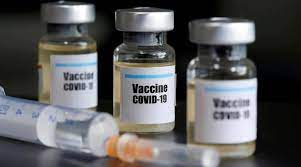

In [2]:
#import the necessary analysis and visualization libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#read the csv file into the notebook
dc = pd.read_csv('../input/state-wise-vaccinations-in-india/Vaccinations in India.csv')
dc.head()

,State,Feb,March,April,May,June,July,August,September,Population
0,Andaman and Nicobar Islands,2422,3186,5273,4300,4642,71739,14240,46342,417036
1,Andhra Pradesh,139337,254016,1073911,1045115,603822,2458155,3019979,5004760,53903393
2,Arunachal Pradesh,6741,13197,34386,24005,6201,90037,68335,167734,1570458
3,Assam,27675,112592,394229,298660,397711,699014,1197727,2380187,35607039
4,Bihar,79212,356801,649824,705670,424038,1677754,2384976,4440766,124799926


In [4]:
dc.describe()#.tail(1)

,Feb,March,April,May,June,July,August,September,Population
count,30.000000,30.000000,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01
mean,79961.800000,205358.800000,5.954924e+05,5.568148e+05,4.885180e+05,1.448697e+06,1.566687e+06,2.848564e+06,4.547448e+07
std,82286.914917,186808.962032,5.772178e+05,5.328194e+05,4.805596e+05,1.311246e+06,1.423769e+06,2.594936e+06,5.175063e+07
min,1224.000000,3186.000000,5.273000e+03,4.300000e+03,3.696000e+03,7.173900e+04,1.424000e+04,4.634200e+04,4.170360e+05
25%,17052.750000,59156.500000,1.764702e+05,1.698785e+05,8.256100e+04,2.968342e+05,2.297162e+05,5.982678e+05,4.990334e+06
50%,44422.000000,166955.000000,3.998120e+05,4.121565e+05,4.108745e+05,9.128005e+05,1.195804e+06,2.013856e+06,3.287421e+07
75%,143408.000000,277805.750000,1.013659e+06,7.409968e+05,6.544028e+05,2.423838e+06,2.749240e+06,4.539307e+06,6.664011e+07
max,310058.000000,604647.000000,1.867952e+06,1.947016e+06,1.802155e+06,4.829411e+06,4.795907e+06,8.669699e+06,2.378827e+08


In [5]:
# Here we see which month had the highest no. of vaccinations across the Nation
dc.iloc[ : ,1:10].sum().sort_values(ascending = False).head(9)

Population    1364234466
September       85456920
August          47000612
July            43460901
April           17864772
May             16704443
June            14655539
March            6160764
Feb              2398854
dtype: int64

In [6]:
#Here we can get the entire row which had maximum no. of vaccinations in a particular month
# we can change the max function to min and also the month name as per our requirements
dc[dc['September']==dc['September'].max()]

,State,Feb,March,April,May,June,July,August,September,Population
27,Uttar Pradesh,310058,604647,1402792,1162929,1008193,3303606,3910445,8669699,237882725


In [7]:
#We know that September had the highest no. of vaccinations
#So let's find out names of top 5 states which contributed the most in the month of September
dc[["State", "September"]].sort_values(by ='September', ascending= False ).head(6)

,State,September
27,Uttar Pradesh,8669699
17,Maharashtra,7917188
9,Gujarat,7071071
16,Madhya Pradesh,6693568
14,Karnataka,6677157
1,Andhra Pradesh,5004760


In [8]:
#Have a close analysis between these states by dropping the other rows
dc2 = dc.drop([0,1,2,3,5,6,8,10,11,12,14,13,16,17,18,19,20,21,22,23,24,25,26,27,28,29])
dc2.head()

,State,Feb,March,April,May,June,July,August,September,Population
4,Bihar,79212,356801,649824,705670,424038,1677754,2384976,4440766,124799926
7,Delhi,37053,214400,438879,534002,580321,862602,1193880,1855679,18710922
9,Gujarat,167448,508314,1816848,1652339,1476287,2320886,3745492,7071071,63872399
15,Kerala,104866,281945,938964,742745,1185703,2805651,1745725,3050294,35699443


<AxesSubplot:xlabel='State', ylabel='March'>

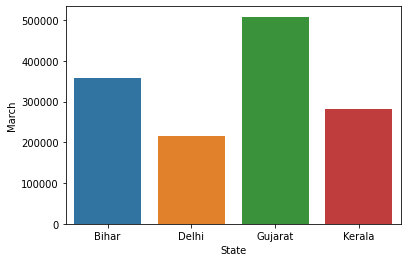

In [9]:
#Visualize the above table in a bar graph
#we can add or subtract as many states as we want and analyse the data according to our requirement
sns.barplot(x='State', y='March', data=dc2)

In [10]:
dc['Sum'] = dc['Feb']+ dc['March'] + dc['April'] + dc['May'] + dc['June']+ dc['July'] + dc['August'] + dc['September']   
dc.head()

,State,Feb,March,April,May,June,July,August,September,Population,Sum
0,Andaman and Nicobar Islands,2422,3186,5273,4300,4642,71739,14240,46342,417036,152144
1,Andhra Pradesh,139337,254016,1073911,1045115,603822,2458155,3019979,5004760,53903393,13599095
2,Arunachal Pradesh,6741,13197,34386,24005,6201,90037,68335,167734,1570458,410636
3,Assam,27675,112592,394229,298660,397711,699014,1197727,2380187,35607039,5507795
4,Bihar,79212,356801,649824,705670,424038,1677754,2384976,4440766,124799926,10719041


In [11]:
#Let's find out that what percentage of population in each state was tested positive from April to January and store this info in a new column
#PoPV = percentage of population infected
dc['PoPV'] = (dc['Sum']/dc['Population'])*100

In [12]:
#let's arrange the columns in descending order and get the top 5 values
#This shows the top 5 states where the percentage of the population vaccinated was maximum
#Increase the head value from 5 to get info. about more states
dc.groupby('State').PoPV.sum().sort_values(ascending = False).head(5)

State
Goa                            43.527880
Chandigarh                     38.420403
Andaman and Nicobar Islands    36.482222
Himachal Pradesh               36.266067
Tripura                        32.748308
Name: PoPV, dtype: float64

In [13]:
#let's arrange the columns in ascending order and get the bottom 5 values
#This shows the top 5 states where the percentage of the population vaccinated was minimum
#Increase the head value from 5 to get info. about more states
dc.groupby('State').PoPV.sum().sort_values(ascending = True).head(5)

State
Uttar Pradesh     8.564039
Bihar             8.588980
Jharkhand        10.539292
Tamil Nadu       14.178622
Manipur          15.420930
Name: PoPV, dtype: float64